In [1]:
#!/usr/bin/python

from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

print data_dict.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

In [2]:
print data_dict['CORDES WILLIAM R']

{'salary': 'NaN', 'to_messages': 764, 'deferral_payments': 'NaN', 'total_payments': 'NaN', 'exercised_stock_options': 651850, 'bonus': 'NaN', 'restricted_stock': 386335, 'shared_receipt_with_poi': 58, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 1038185, 'expenses': 'NaN', 'loan_advances': 'NaN', 'from_messages': 12, 'other': 'NaN', 'from_this_person_to_poi': 0, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'bill.cordes@enron.com', 'from_poi_to_this_person': 10}


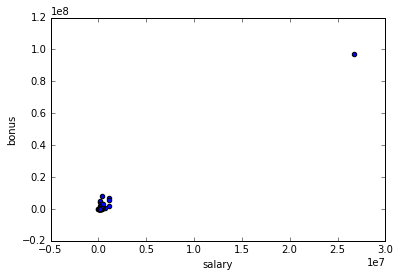

In [3]:
%matplotlib inline

features = ["salary", "bonus"]
data = featureFormat(data_dict, features, sort_keys = True)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [4]:
for key, value in data_dict.items():
    if (value["salary"] != 'NaN') and (value["salary"] > 2e7) :
        print key, value["salary"]

TOTAL 26704229


In [5]:
data_dict.pop('TOTAL', 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

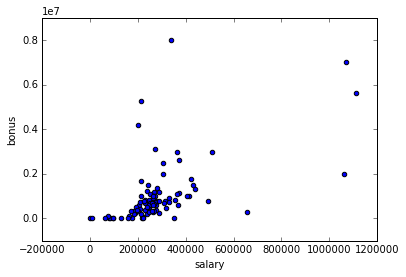

In [6]:
features = ["salary", "bonus"]
data = featureFormat(data_dict, features, sort_keys = True)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [7]:
for key, value in data_dict.items():
    if (value["from_poi_to_this_person"] == "NaN") or (value["to_messages"] == "NaN"):
        data_dict[key]["from_poi_email_fraction"] = 0
    else:
        data_dict[key]["from_poi_email_fraction"] = float(value["from_poi_to_this_person"]) / value["to_messages"]
        
    if (value["from_this_person_to_poi"] == "NaN") or (value["from_messages"] == "NaN"):
        data_dict[key]["to_poi_email_fraction"] = 0
    else:
        data_dict[key]["to_poi_email_fraction"] = float(value["from_this_person_to_poi"]) / value["from_messages"]

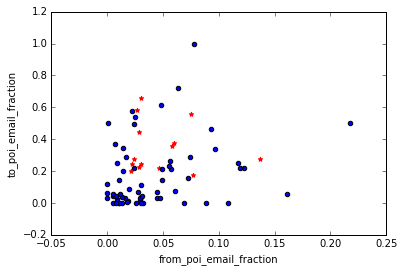

In [8]:
features = ["poi", "from_poi_email_fraction", "to_poi_email_fraction"]
data = featureFormat(data_dict, features, sort_keys = True)

POI_from_poi = []
POI_to_poi = []
Non_POI_from_poi = []
Non_POI_to_poi = []
for point in data:
    from_poi_email_fraction = point[1]
    to_poi_email_fraction = point[2]
    if point[0] == 1:
        POI_from_poi.append(from_poi_email_fraction)
        POI_to_poi.append(to_poi_email_fraction)
    else:
        Non_POI_from_poi.append(from_poi_email_fraction)
        Non_POI_to_poi.append(to_poi_email_fraction)

plt.scatter( POI_from_poi, POI_to_poi, color="r", marker="*")
plt.scatter( Non_POI_from_poi, Non_POI_to_poi)
plt.xlabel("from_poi_email_fraction")
plt.ylabel("to_poi_email_fraction")
plt.show()

In [9]:


features_list = ['poi', 'from_poi_email_fraction', 'to_poi_email_fraction','salary', 'deferral_payments',
                 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi',
                 'restricted_stock_deferred', 'total_stock_value','expenses', 'loan_advances', 'director_fees',
                 'deferred_income', 'long_term_incentive']

my_dataset = data_dict

data = featureFormat(my_dataset, features_list)

labels, features = targetFeatureSplit(data)

from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train, labels_train)

print "accuracy is", clf.score(features_test, labels_test)

importances = clf.feature_importances_
# print importances
indices = np.argsort(importances)[::-1]
# print indices
print 'Feature Ranking: '
for i in range(len(features_list)-1):
    print "Feature {}: {} ({})".format(i+1,features_list[indices[i] + 1],importances[indices[i]])

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred = clf.predict(features_test)  
print "precision is ", precision_score(labels_test, pred)
print "recall is ", recall_score(labels_test, pred)

accuracy is 0.772727272727
Feature Ranking: 
Feature 1: deferred_income (0.423529411765)
Feature 2: exercised_stock_options (0.25)
Feature 3: to_poi_email_fraction (0.204318689501)
Feature 4: restricted_stock (0.0633283693224)
Feature 5: expenses (0.0588235294118)
Feature 6: long_term_incentive (0.0)
Feature 7: director_fees (0.0)
Feature 8: loan_advances (0.0)
Feature 9: total_stock_value (0.0)
Feature 10: restricted_stock_deferred (0.0)
Feature 11: shared_receipt_with_poi (0.0)
Feature 12: bonus (0.0)
Feature 13: total_payments (0.0)
Feature 14: deferral_payments (0.0)
Feature 15: salary (0.0)
Feature 16: from_poi_email_fraction (0.0)
precision is  0.25
recall is  0.125


In [10]:
#!/usr/bin/python

import matplotlib.pyplot as plt
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'total_stock_value', 'deferred_income', 'from_poi_email_fraction', 
                        'to_poi_email_fraction', 'shared_receipt_with_poi', 'salary', 'bonus', 'total_payments',
                        ] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


### Task 2: Remove outliers
data_dict.pop('TOTAL', 0)

### Task 3: Create new feature(s)
for key, value in data_dict.items():
    if (value["from_poi_to_this_person"] == "NaN") or (value["to_messages"] == "NaN"):
        data_dict[key]["from_poi_email_fraction"] = 0
    else:
        data_dict[key]["from_poi_email_fraction"] = float(value["from_poi_to_this_person"]) / value["to_messages"]
        
    if (value["from_this_person_to_poi"] == "NaN") or (value["from_messages"] == "NaN"):
        data_dict[key]["to_poi_email_fraction"] = 0
    else:
        data_dict[key]["to_poi_email_fraction"] = float(value["from_this_person_to_poi"]) / value["from_messages"]
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=5)

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
'''
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
'''

### use KFold for split and validate algorithm

from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]



clf = clf.fit(features_train, labels_train)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
pred = clf.predict(features_test)  
print "precision is ", precision_score(labels_test, pred)
print "recall is ", recall_score(labels_test, pred)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)

precision is  0.5
recall is  0.6
